In [1]:
%load_ext autoreload
%autoreload 2
main_dir = r'../../..'
data_path = main_dir+'/data'
import sys
sys.path.append(main_dir)
from typing import List, Set, Dict, Optional, Any, Tuple, Type, Union

from BayDS.lib.pipeline import *
from BayDS.lib.io import *

import os


In [2]:
data_dir = f'e:/kaggle/05-LabelEncoded-last'
p = Pipeline(working_folder=f'{main_dir}/Snapshots/1/TestC5')

p.add_node(LoaderNode, None, 'data',
           params={
               'input_directory': data_dir,
               'file': 'label_encoded_data.pkl'
           })
p.add_node(LoaderNode, None, 'numerical_columns',
           params={
               'input_directory': data_dir,
               'file': 'numerical_columns.yaml'
           })
p.add_node(LoaderNode, None, 'categorical_columns',
           params={
               'input_directory': data_dir,
               'file': 'categorical_columns.yaml'
           })
p.add_node(LoaderNode, None, 'bad_for_training_features',
           params={
               'input_directory': data_dir,
               'file': 'bad_for_training_features.yaml'
           })
p.save()
p.run(verbose=True)

---------------------------
0: LoaderNode [2019-09-26 21:59:50]
params:
 {'input_directory': '../../../Snapshots/1/Test', 'file': 'label_encoded_data.pkl'}
---------------------------
1: LoaderNode [2019-09-26 21:59:55]
params:
 {'input_directory': '../../../Snapshots/1/Test', 'file': 'numerical_columns.yaml'}
---------------------------
2: LoaderNode [2019-09-26 21:59:55]
params:
 {'input_directory': '../../../Snapshots/1/Test', 'file': 'categorical_columns.yaml'}
---------------------------
3: CorrectScreenWidthHeightTypeNode [2019-09-26 21:59:55]
params:
 None
---------------------------
4: LoaderNode [2019-09-26 21:59:56]
params:
 {'input_directory': '../../../Snapshots/1/Test', 'file': 'bad_for_training_features.yaml'}
---------------------------
5: LoaderNode [2019-09-26 21:59:56]
params:
 {'input_directory': '../../../Snapshots/1/Test', 'file': 'rfe.yaml'}
---------------------------
6: DropFeaturesNode [2019-09-26 21:59:56]
params:
 {'drop': ['uid3_DT_M', 'V21', 'M9', 'nulls1',

## Code to make pipeline node

In [4]:
# df = p.data['data']
train = p.data['train_data'][p.data['train_data'].isFraud >= 0]
test =  p.data['data'][p.data['data'].isFraud < 0]


In [5]:
X = train.drop('isFraud',axis=1)
y = train['isFraud']

test =  test.drop('isFraud',axis=1)

X.replace(np.inf, np.nan, inplace=True)
X.replace(-np.inf, np.nan, inplace=True)
test.replace(np.inf, np.nan, inplace=True)
test.replace(-np.inf, np.nan, inplace=True)

categorical_features = [c for c, col in enumerate(X.columns) if col in p.data['categorical_columns']]

del p
train_idx = train.index
del train
gc.collect()

0

In [6]:
for col in X.columns:
    if str(X[col].dtype) == 'datetime64[ns]':
        print (col, X[col].dtype)
        X[col] = pd.to_timedelta(X[col]).map(lambda qq:qq.days)
        test[col] = pd.to_timedelta(test[col]).map(lambda qq:qq.days)
#         X[col] = X[col].astype(datetime.datetime)

start_date datetime64[ns]


c:\python37\lib\site-packages\pandas\util\_decorators.py:208: FutureWarning: Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version
  return func(*args, **kwargs)


In [7]:
from sklearn.model_selection import KFold
n_fold = 5
# folds = TimeSeriesSplit(n_splits=n_fold)
folds = KFold(n_splits=5)

In [8]:
from BayDS.lib.training import *

Using TensorFlow backend.
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

In [ ]:
test

Fold 1 started at Thu Sep 26 22:02:29 2019
Training until validation scores don't improve for 200 rounds.
[100]	training's auc: 0.961194	training's auc: 0.961194	valid_1's auc: 0.882533	valid_1's auc: 0.882533
[200]	training's auc: 0.976009	training's auc: 0.976009	valid_1's auc: 0.890262	valid_1's auc: 0.890262
[300]	training's auc: 0.986784	training's auc: 0.986784	valid_1's auc: 0.896686	valid_1's auc: 0.896686
[400]	training's auc: 0.993408	training's auc: 0.993408	valid_1's auc: 0.902067	valid_1's auc: 0.902067
[500]	training's auc: 0.996947	training's auc: 0.996947	valid_1's auc: 0.906034	valid_1's auc: 0.906034
[600]	training's auc: 0.998683	training's auc: 0.998683	valid_1's auc: 0.908503	valid_1's auc: 0.908503
[700]	training's auc: 0.999476	training's auc: 0.999476	valid_1's auc: 0.909904	valid_1's auc: 0.909904
[800]	training's auc: 0.999809	training's auc: 0.999809	valid_1's auc: 0.910454	valid_1's auc: 0.910454
[900]	training's auc: 0.999935	training's auc: 0.999935	valid_

[1200]	training's auc: 1	training's auc: 1	valid_1's auc: 0.93074	valid_1's auc: 0.93074
[1300]	training's auc: 1	training's auc: 1	valid_1's auc: 0.930965	valid_1's auc: 0.930965
[1400]	training's auc: 1	training's auc: 1	valid_1's auc: 0.931099	valid_1's auc: 0.931099
[1500]	training's auc: 1	training's auc: 1	valid_1's auc: 0.93114	valid_1's auc: 0.93114
Early stopping, best iteration is:
[1356]	training's auc: 1	training's auc: 1	valid_1's auc: 0.931072	valid_1's auc: 0.931072
CV mean score: 0.9351, std: 0.0137.


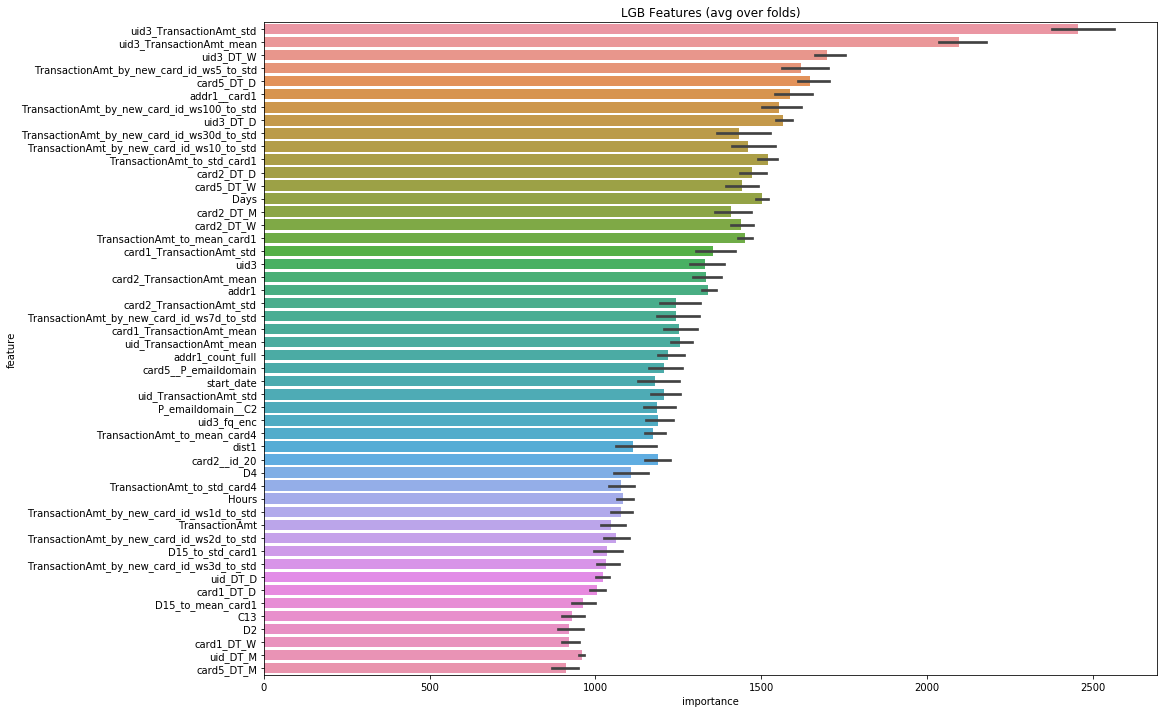

In [9]:
gc.collect()
params = {'num_leaves': 491,
          'min_child_weight': 0.03454472573214212,
          'feature_fraction': 0.3797454081646243,
          'bagging_fraction': 0.4181193142567742,
          'min_data_in_leaf': 106,
          'objective': 'binary',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.3899927210061127,
          'reg_lambda': 0.6485237330340494,
          'random_state': 47, 
         }
result_dict_lgb = train_model_classification(X=X, X_test=test, y=y, params=params, folds=folds, model_type='lgb', eval_metric='auc', plot_feature_importance=True,
                                                      verbose=100, early_stopping_rounds=200, n_estimators=10000, averaging='usual', n_jobs=-1, groups=None)

In [11]:
pd.DataFrame(result_dict_lgb['oof'], columns=['isFraud'], index=train_idx).to_csv(f'{main_dir}/Snapshots/1/Training2509/oof_all_data_best_lgb.csv')

pd.DataFrame(result_dict_lgb['prediction'], columns=['isFraud'], index=test.index).to_csv(f'{main_dir}/Snapshots/1/Training2509/prediction_all_data_best_lgb.csv')

sample_submission = pd.read_csv(data_path + '/sample_submission.csv').set_index('TransactionID')

sub1 = pd.DataFrame(result_dict_lgb['prediction'], columns=['isFraud'], index=test.index)

sample_submission['isFraud'] = sub1#*0.5 + sub2*0.25 + sub3*0.25

sample_submission.to_csv(f'{main_dir}/lgb_sub.csv')